Making a Neural Net from scratch!
---

### Import things

In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from tensorflow.keras import Model
from tensorflow.keras.layers import Input, InputLayer, Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import utils
from tensorflow.keras.applications import VGG19

from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import SGD

In [2]:
train = pd.read_csv('./CSVs/train.csv')

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
len(train)

42000

### Visualize some of the numbers

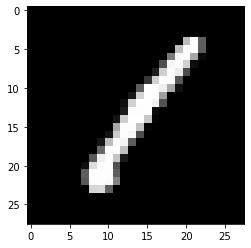

In [5]:
plt.imshow(np.reshape(train.loc[0].drop('label').to_numpy(), (28,28)), cmap='gray')

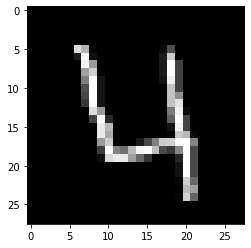

In [6]:
plt.imshow(np.reshape(train.loc[3].drop('label').to_numpy(), (28,28)), cmap='gray')

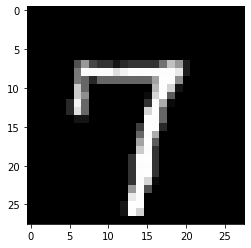

In [7]:
plt.imshow(np.reshape(train.loc[6].drop('label').to_numpy(), (28,28)), cmap='gray')

### Make the X and y (feature matrix and target vector)

In [8]:
y = train['label'].to_numpy()
y

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [9]:
X = train.drop('label', axis=1)
X = np.reshape(X.to_numpy(), (-1, 28, 28, 1))
X.shape

(42000, 28, 28, 1)

### Split into training and testing

In [10]:
X_train = X[:-2000]
X_test = X[40000:]

y_train = y[:-2000]
y_test = y[40000:]

In [11]:
len(X_train)

40000

In [12]:
len(X_test)

2000

### Some preprocessing

In [13]:
X_train = X_train/255
X_test = X_test/255

In [14]:
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)
y_train[:5]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

### Reference Model:

In [15]:
reference = VGG19()

In [16]:
reference.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

### My model <3
I used the VGG19 model as a reference for my layers. The VGG19 model takes an input of size 224 and mine is only 28 so I put in much only 2 convolutional layers

In [17]:
class model(Model):
    def __init__(self):
        super(model, self).__init__()
        
        # initialize first set
        self.block1_conv1 = Conv2D(filters=32,           
                     kernel_size=(3, 3),   
                     activation='relu',
                     input_shape=(28, 28, 1))
        
        self.block1_conv2 = Conv2D(filters=64,           
                     kernel_size=(3, 3),   
                     activation='relu')
        self.block1_pool = MaxPooling2D(pool_size=(2, 2))
        
        # initialize fully connected set
        self.flatten = Flatten(input_shape=(28, 28, 1))
        self.fc1 = Dense(128, activation="relu")
        self.fc2 = Dense(32, activation="relu")
        self.predictions = Dense(10, activation="softmax")
    
    def call(self, inputs):
        # building the first set
        x = self.block1_conv1(inputs)
        x = self.block1_conv2(x)
        x = self.block1_pool(x)

        #building the fully connected set
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.predictions(x)
        return x

# this part returns the summary. 
# source = https://stackoverflow.com/questions/55235212/model-summary-cant-print-output-shape-while-using-subclass-model
    def model(self):
        x = Input(shape=(28, 28, 1))
        return Model(inputs=[x], outputs=self.call(x))

if __name__ == '__main__':
    sub = model()
    sub.model().summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128

In [18]:
model = model()

In [19]:
#compile model:
model.compile(loss='categorical_crossentropy',
              optimizer= 'adam',
              metrics=['accuracy'])

In [21]:
model.fit(X_train, y_train, batch_size=100, validation_data=(X_test, y_test), epochs=10, verbose=1)

Epoch 1/10
400/400 [==============================] - 28s 70ms/step - loss: 0.0778 - accuracy: 0.9765 - val_loss: 0.0699 - val_accuracy: 0.9795
Epoch 2/10
400/400 [==============================] - 27s 68ms/step - loss: 0.0415 - accuracy: 0.9872 - val_loss: 0.0583 - val_accuracy: 0.9835
Epoch 3/10
400/400 [==============================] - 27s 68ms/step - loss: 0.0270 - accuracy: 0.9919 - val_loss: 0.0487 - val_accuracy: 0.9845
Epoch 4/10
400/400 [==============================] - 28s 69ms/step - loss: 0.0196 - accuracy: 0.9936 - val_loss: 0.0542 - val_accuracy: 0.9830
Epoch 5/10
400/400 [==============================] - 27s 68ms/step - loss: 0.0132 - accuracy: 0.9956 - val_loss: 0.0553 - val_accuracy: 0.9850
Epoch 6/10
400/400 [==============================] - 27s 68ms/step - loss: 0.0110 - accuracy: 0.9965 - val_loss: 0.0535 - val_accuracy: 0.9870
Epoch 7/10
400/400 [==============================] - 27s 68ms/step - loss: 0.0099 - accuracy: 0.9970 - val_loss: 0.0503 - val_accuracy:

In [22]:
score = model.evaluate(X_test, y_test, verbose=1)

63/63 [==============================] - 1s 6ms/step - loss: 0.0603 - accuracy: 0.9885


### Now with regularization

In [23]:
class model_regularized(Model):
    def __init__(self):
        super(model_regularized, self).__init__()
        
        # initialize first set
        # initialize first set
        self.block1_conv1 = Conv2D(filters=32,           
                     kernel_size=(3, 3),   
                     activation='relu',
                     input_shape=(28, 28, 1))
        self.block1_conv2 = Conv2D(filters=64,           
                     kernel_size=(3, 3),   
                     activation='relu')
        self.block1_pool = MaxPooling2D(pool_size=(2, 2))
        
        # initialize fully connected set
        self.flatten = Flatten(input_shape=(28, 28, 1))
        self.fc1 = Dense(128, activation="relu", kernel_regularizer=l2(0.001))
        self.fc2 = Dense(32, activation="relu", kernel_regularizer=l2(0.001))
        self.predictions = Dense(10, activation="softmax", kernel_regularizer=l2(0.001))
    
    def call(self, inputs):
        # building the first set
        x = self.block1_conv1(inputs)
        x = self.block1_conv2(x)
        x = self.block1_pool(x)

        #building the fully connected set
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.predictions(x)
        return x
    
    def model(self):
        x = Input(shape=(28, 28, 1))
        return Model(inputs=[x], outputs=self.call(x))

In [24]:
model2 = model_regularized()

In [25]:
#compile model:
model2.compile(loss='categorical_crossentropy',
              optimizer= 'adam',
              metrics=['accuracy'])

In [26]:
model2.fit(X_train, y_train, batch_size=100, validation_data=(X_test, y_test), epochs=10, verbose=1)

Epoch 1/10
400/400 [==============================] - 28s 70ms/step - loss: 0.6954 - accuracy: 0.8456 - val_loss: 0.2173 - val_accuracy: 0.9720
Epoch 2/10
400/400 [==============================] - 28s 69ms/step - loss: 0.2006 - accuracy: 0.9755 - val_loss: 0.1898 - val_accuracy: 0.9785
Epoch 3/10
400/400 [==============================] - 27s 68ms/step - loss: 0.1616 - accuracy: 0.9820 - val_loss: 0.1746 - val_accuracy: 0.9760
Epoch 4/10
400/400 [==============================] - 27s 69ms/step - loss: 0.1474 - accuracy: 0.9835 - val_loss: 0.1830 - val_accuracy: 0.9700
Epoch 5/10
400/400 [==============================] - 27s 68ms/step - loss: 0.1376 - accuracy: 0.9849 - val_loss: 0.1726 - val_accuracy: 0.9720
Epoch 6/10
400/400 [==============================] - 28s 69ms/step - loss: 0.1269 - accuracy: 0.9858 - val_loss: 0.1405 - val_accuracy: 0.9800
Epoch 7/10
400/400 [==============================] - 28s 70ms/step - loss: 0.1137 - accuracy: 0.9883 - val_loss: 0.1336 - val_accuracy:

In [27]:
score = model2.evaluate(X_test, y_test, verbose=1)

63/63 [==============================] - 1s 7ms/step - loss: 0.1294 - accuracy: 0.9775


### Making the submission

In [28]:
test_df = pd.read_csv('./CSVs/test.csv')

In [29]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
test = np.reshape(test_df.to_numpy(), (-1, 28, 28, 1))
test.shape

(28000, 28, 28, 1)

In [31]:
test = test/255

In [32]:
preds = model2.predict(test)

In [33]:
classes = preds.argmax(axis=-1)

In [34]:
predictions = pd.DataFrame(classes)

In [35]:
predictions.head()

,0
0,2
1,0
2,9
3,0
4,3


In [36]:
sample = pd.read_csv('./CSVs/sample_submission.csv')
sample.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [37]:
predictions = predictions.reset_index()

In [38]:
predictions.columns = ['ImageId', 'Label']

In [39]:
predictions.head()

,ImageId,Label
0,0,2
1,1,0
2,2,9
3,3,0
4,4,3


In [40]:
predictions['ImageId'] = predictions['ImageId'].map(lambda x: x +1)

In [41]:
predictions.to_csv('./CSVs/submission.csv', index=False)

### Visualize some of the predictions

prediction: 2


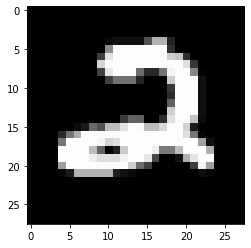

In [42]:
print('prediction:', predictions.loc[0]['Label'])
plt.imshow(np.reshape(test_df.loc[0].to_numpy(), (28,28)), cmap='gray')

prediction: 0


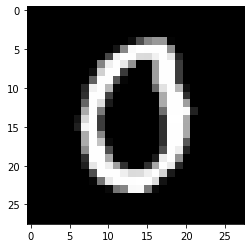

In [43]:
print('prediction:', predictions.loc[100]['Label'])
plt.imshow(np.reshape(test_df.loc[100].to_numpy(), (28,28)), cmap='gray')

prediction: 4


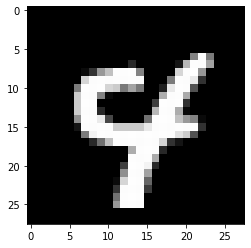

In [44]:
print('prediction:', predictions.loc[255]['Label'])
plt.imshow(np.reshape(test_df.loc[255].to_numpy(), (28,28)), cmap='gray')

### I got a 0.98110 on kaggle